In [ ]:
!wget https://www.dropbox.com/sh/neq91ltflgdjfex/AADz-8Jo2O8Y7wcejv6_MeDTa?dl=0

--2021-01-03 18:20:59--  https://www.dropbox.com/sh/neq91ltflgdjfex/AADz-8Jo2O8Y7wcejv6_MeDTa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/neq91ltflgdjfex/AADz-8Jo2O8Y7wcejv6_MeDTa [following]
--2021-01-03 18:20:59--  https://www.dropbox.com/sh/raw/neq91ltflgdjfex/AADz-8Jo2O8Y7wcejv6_MeDTa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucade76e8d681de1ff98268321a7.dl.dropboxusercontent.com/zip_download_get/Aps5AjdwaaWGjyPHsZIf0ijuk8ZFlvMFXBgwzLR0XysRNIkQMBf86XU6PLgYcB0GWaETe16Cj8Hy8icXKxsCEP6vXKZE6FWv7fiQ4DexnVb6TQ [following]
--2021-01-03 18:20:59--  https://ucade76e8d681de1ff98268321a7.dl.dropboxusercontent.com/zip_download_get/Aps5AjdwaaWGjyPHsZIf0ijuk8ZFlvMFXBgwzLR0XysRNIkQMBf86XU6PLgYcB0GWaETe16Cj8Hy8icXK

In [ ]:
!unzip Covid_19

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.preprocessing import image
from keras.models import Sequential


In [ ]:

#CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 54, 54, 64)      

In [ ]:
#Train from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset =image.ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 313 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 79 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs =10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 0.7892 - accuracy: 0.6084 - val_loss: 0.6341 - val_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5242 - accuracy: 0.7345 - val_loss: 0.4542 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.2630 - accuracy: 0.9004 - val_loss: 0.2290 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.2279 - accuracy: 0.9235 - val_loss: 0.2519 - val_accuracy: 0.9375
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.2766 - accuracy: 0.8915 - val_loss: 0.2407 - val_accuracy: 0.9531
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2110 - accuracy: 0.9515 - val_loss: 0.0790 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.1785 - accuracy: 0.9321 - val_loss: 0.1713 - val_accuracy: 0.9688
Epoch 8/10
8/8 [==================

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.10035784542560577, 0.9648562073707581]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.13151411712169647, 0.9746835231781006]

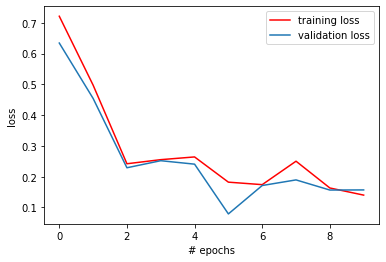

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

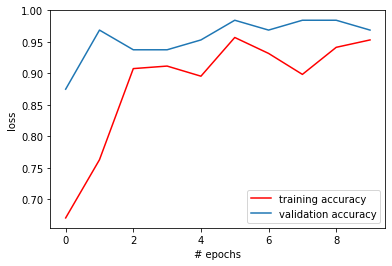

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save("predict_covid.model")

INFO:tensorflow:Assets written to: predict_covid.model/assets


In [ ]:
model.save("predict_covid.h5")